<a href="https://colab.research.google.com/github/sbogde/pandamonium/blob/main/dmi_01_world_happiness_report_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Happiness Report 🙂

In [41]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default styling for visualizations
sns.set(style="whitegrid")

In [42]:
# Upload the dataset
# from google.colab import files
# uploaded = files.upload()  # Manually upload the CSV file

# Load the dataset into a DataFrame (update filename as needed)
# file_name = "world_happiness.csv"  # Adjust to your uploaded file name
# df = pd.read_csv(file_name)

# Display the first few rows to confirm successful loading
# df.head()

In [43]:
# Loading The Dataset
# Check if running in Google Colab
# Dynamically set the file path based on the execution environment
if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive', force_remount=True)
    file_path = '/content/drive/My Drive/Colab Notebooks/data-mining/data/world_happiness_report_2024.csv'
    data_table.enable_dataframe_formatter()
else:
    file_path = './data/world_happiness_report_2024.csv'  # Local path

Mounted at /content/drive


In [44]:
df = pd.read_csv(file_path)

# Display the first few rows to confirm successful loading
df.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [45]:
df.columns = df.columns.str.strip()

In [46]:
# Initial inspection of DataFrame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  143 non-null    object 
 1   Ladder score                  143 non-null    float64
 2   upperwhisker                  143 non-null    float64
 3   lowerwhisker                  143 non-null    float64
 4   Logged GDP per capita         140 non-null    float64
 5   Social support                140 non-null    float64
 6   Healthy life expectancy       140 non-null    float64
 7   Freedom to make life choices  140 non-null    float64
 8   Generosity                    140 non-null    float64
 9   Perceptions of corruption     140 non-null    float64
 10  Dystopia + residual           140 non-null    float64
dtypes: float64(10), object(1)
memory usage: 12.4+ KB


In [47]:
# Check for missing values
print("\nMissing values across columns:")
print(df.isnull().sum())


Missing values across columns:
Country name                    0
Ladder score                    0
upperwhisker                    0
lowerwhisker                    0
Logged GDP per capita           3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [48]:
# Drop irrelevant columns and handle missing values
columns_to_drop = ['Dystopia + residual']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Drop rows with missing values
df = df.dropna()

# Verify the cleaned DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Ladder score                  140 non-null    float64
 2   upperwhisker                  140 non-null    float64
 3   lowerwhisker                  140 non-null    float64
 4   Logged GDP per capita         140 non-null    float64
 5   Social support                140 non-null    float64
 6   Healthy life expectancy       140 non-null    float64
 7   Freedom to make life choices  140 non-null    float64
 8   Generosity                    140 non-null    float64
 9   Perceptions of corruption     140 non-null    float64
dtypes: float64(9), object(1)
memory usage: 12.0+ KB


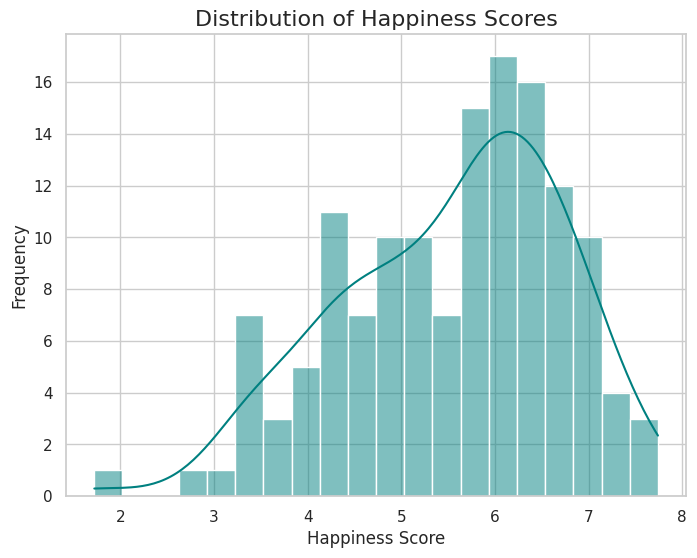

In [49]:
# Happiness score distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Ladder score'], kde=True, bins=20, color='teal')
plt.title('Distribution of Happiness Scores', fontsize=16)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [51]:
# Calculate the correlation
correlation = df['Ladder score'].corr(df['Logged GDP per capita'])
print(f"The correlation between Happiness Score and GDP per Capita is: {correlation:.2f}")

The correlation between Happiness Score and GDP per Capita is: 0.77


In [52]:
!pip install pycountry_convert


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 17.0 MB/s eta 0:00:00


In [54]:
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except Exception as e:
        return 'Unknown'

df['Region'] = df['Country name'].apply(country_to_continent)


In [55]:
print(df.columns)

Index(['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Region'],
      dtype='object')


In [57]:
# df.head(21)

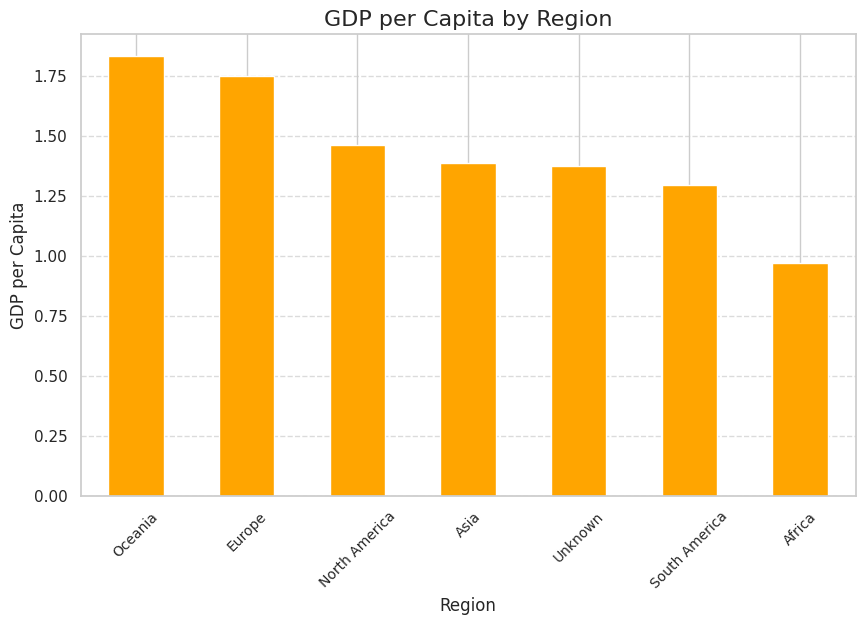

In [58]:
# Mean GDP per region shown in a bar chart
gdp_trends = df.groupby('Region')['Logged GDP per capita'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
gdp_trends.plot(kind='bar', color='orange')
plt.title('GDP per Capita by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('GDP per Capita', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


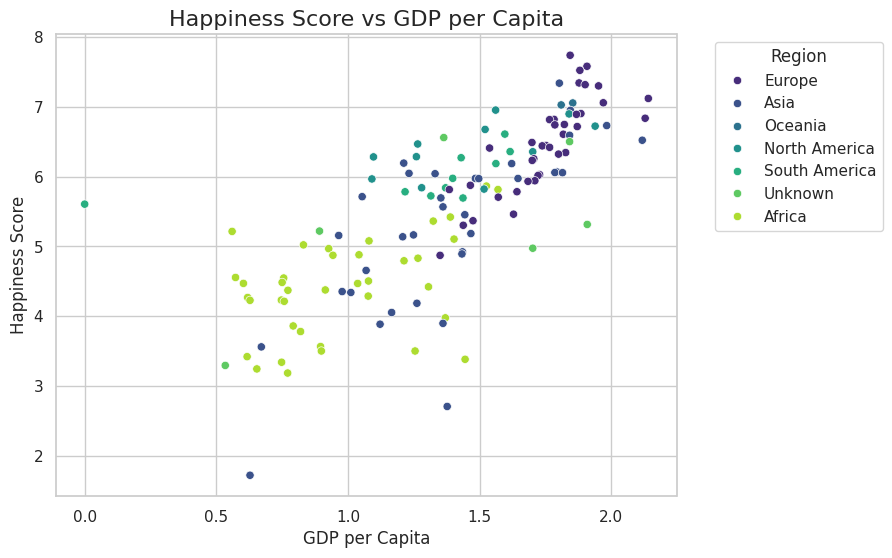

In [61]:
# Scatter plot to check correlation between GDP and Happiness Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Logged GDP per capita', y='Ladder score', hue='Region', data=df, palette='viridis')
plt.title('Happiness Score vs GDP per Capita', fontsize=16)
plt.xlabel('GDP per Capita', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()